<a href="https://colab.research.google.com/github/InowaR/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Choose a random image from dataset
Enter q to exit

Enter a number (0 - 59999):
12


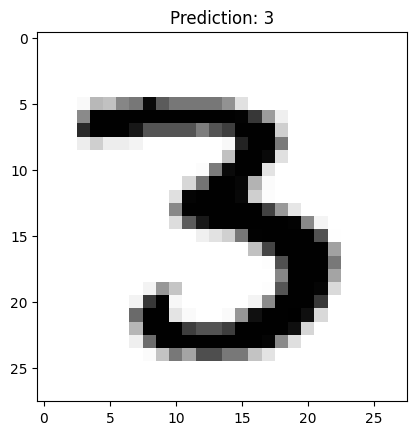

Choose a random image from dataset
Enter q to exit

Enter a number (0 - 59999):
34


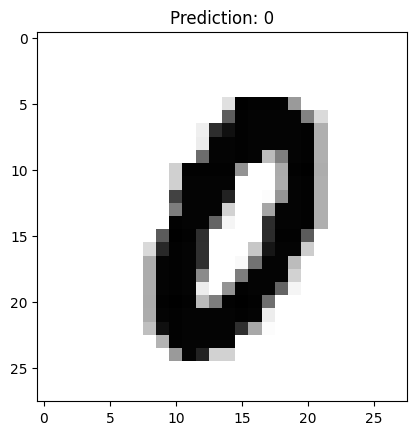

Choose a random image from dataset
Enter q to exit

Enter a number (0 - 59999):
q
Exit


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

def load_dataset():
  with np.load("mnist.npz") as f:
    x_train = f['x_train'].astype("float32") / 255
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] * x_train.shape[2]))
    y_train = f['y_train']
    y_train = np.eye(10)[y_train]
    return x_train, y_train

images, labels = load_dataset()

def train():
  w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
  w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
  b_i_h = np.zeros((20, 1))
  b_h_o = np.zeros((10, 1))

  learn_rate = 0.01
  nr_correct = 0
  loss = 0
  epochs = 3

  print("Training starts")
  print("-----------------")
  for epoch in range(epochs):
    for image, label in zip(images, labels):
      image = np.reshape(image, (-1, 1))
      label = np.reshape(label, (-1, 1))

      h_pre = b_i_h + w_i_h @ image
      h = 1 / (1 + np.exp(-h_pre))

      o_pre = b_h_o + w_h_o @ h
      o = 1 / (1 + np.exp(-o_pre))

      loss += 1 / len(o) * np.sum((o - label) ** 2, axis=0)
      nr_correct += int(np.argmax(o) == np.argmax(label))

      delta_o = o - label
      w_h_o += -learn_rate * delta_o @ np.transpose(h)
      b_h_o += -learn_rate * delta_o

      delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
      w_i_h += -learn_rate * delta_h @ np.transpose(image)
      b_i_h += -learn_rate * delta_h

    print(f"Loss: {round((loss[0] / images.shape[0]) * 100, 2)}%")
    print(f"Accuracy: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0
    loss = 0

  weights = w_i_h, w_h_o, b_i_h, b_h_o
  with open('weights.txt', 'wb') as out:
    pickle.dump(weights, out)
  print("-----------------")
  print("Weights are saved")


def test():
  with open('weights.txt', 'rb') as weights:
    w_i_h, w_h_o, b_i_h, b_h_o = pickle.load(weights)

  while True:
    print("Choose a random image from dataset")
    print("Enter q to exit\n")
    enter = input("Enter a number (0 - 59999):\n")
    if enter == "q":
      break
    index = int(enter)
    image = images[index]
    plt.imshow(image.reshape(28, 28), cmap="Greys")
    image.shape += (1,)

    h_pre = b_i_h + w_i_h @ image.reshape(784, 1)
    h = 1 / (1 + np.exp(-h_pre))

    o_pre = b_h_o + w_h_o @ h
    o = 1 / (1 + np.exp(-o_pre))

    plt.title(f"Prediction: {o.argmax()}")
    plt.show()

  print("Exit")


# train()
test()